In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [380]:
users_df = pd.read_csv('./data/takehome_users.csv', encoding='latin-1')
engagement = pd.read_csv('./data/takehome_user_engagement.csv', encoding='latin-1')

In [381]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [382]:
# Convert invited_by_user_id to int
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].fillna(0).astype(int)

In [383]:
# Add a column to record number of users invited
invited = users_df['invited_by_user_id'].value_counts()
users_df['users_invited'] = users_df['object_id'].map(invited).fillna(0).astype(int)

# Column to track if a user was invited
users_df['invited'] = users_df['invited_by_user_id'].apply(lambda x: 1 if x > 0 else 0)

In [384]:
# Track the number of users in each org_id
org = users_df['org_id'].value_counts()
users_df['org_size'] = users_df['org_id'].map(org).astype(int)

In [385]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,users_invited,invited,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,0,1,75
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,0,1,233
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,1,1,32
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,0,1,233
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263,0,1,40
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,1,0,25
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074,0,1,27
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,7,0,138


In [386]:
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [387]:
# Track the number of logins for each user
logins = engagement['user_id'].value_counts()
users_df['logins'] = users_df['object_id'].map(logins).fillna(0).astype(int)

In [388]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,users_invited,invited,org_size,logins
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,0,1,75,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,0,1,233,14
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,1,1,32,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,0,1,233,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,0,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263,0,1,40,1
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,1,0,25,1
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074,0,1,27,1
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,7,0,138,1


<Axes: title={'center': 'Number of Logins'}, ylabel='Frequency'>

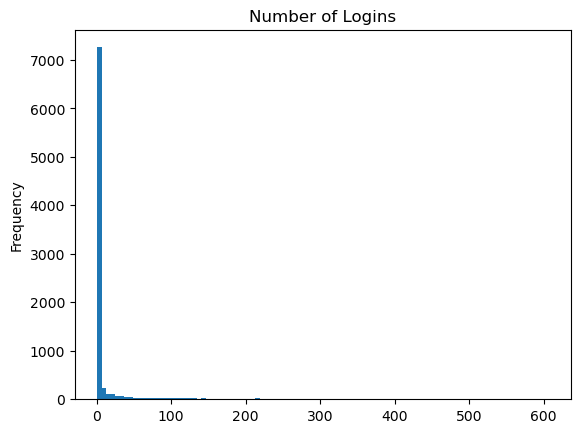

In [389]:
logins.plot(kind='hist', bins=100, title='Number of Logins')

<Axes: title={'center': 'Number of Logins (>= 10)'}, ylabel='Frequency'>

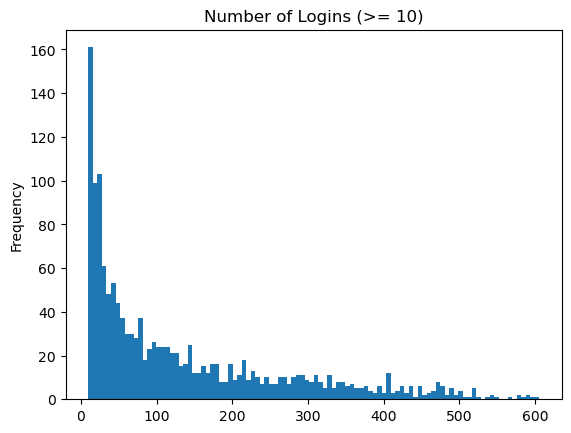

In [390]:
logins_over_10 = logins[logins >= 10]
logins_over_10.plot(kind='hist', bins=100, title='Number of Logins (>= 10)')

In [391]:
# Create a column to track if a user is adopted
adopted = engagement.groupby('user_id').rolling(window=7, on='time_stamp').visited.count()
adopted = adopted.groupby('user_id').max()
adopted = adopted[adopted >= 3]
adopted = adopted.index.get_level_values(0)
users_df['adopted'] = users_df['object_id'].isin(adopted).astype(int)

users_df

C:\Users\eliwi\AppData\Local\Temp\ipykernel_12112\79668724.py:2: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  adopted = engagement.groupby('user_id').rolling(window=7, on='time_stamp').visited.count()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,users_invited,invited,org_size,logins,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803,0,1,75,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316,0,1,233,14,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525,1,1,32,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151,0,1,233,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240,0,1,16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263,0,1,40,1,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0,1,0,25,1,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074,0,1,27,1,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0,7,0,138,1,0


In [392]:
# Column to track earliest login after creation
earliest_login = engagement.groupby('user_id').time_stamp.min()
users_df['earliest_login'] = users_df['object_id'].map(earliest_login)

# Convert earliest_login to days after creation
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['earliest_login'] = pd.to_datetime(users_df['earliest_login'])
users_df['earliest_login'] = (users_df['earliest_login'] - users_df['creation_time']).dt.days.fillna(0).astype(int)

In [393]:
# Pull rows with missing values for last_session_creation_time
missing_last_session = users_df[users_df['last_session_creation_time'].isna()]
missing_last_session

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,users_invited,invited,org_size,logins,adopted,earliest_login
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0,0,0,38,0,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0,0,0,19,0,0,0
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270,0,1,25,0,0,0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,0,0,0,24,0,0,0
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,0,0,0,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,0,0,0,21,0,0,0
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,0,1,0,50,0,0,0
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,0,0,0,38,0,0,0
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,0,0,0,18,0,0,0


In [394]:
missing_last_session['logins'].describe()

count    3177.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: logins, dtype: float64

## As expected, users with NaN values in the 'last_session_creation_time' column also have 0 logins.

In [395]:
##Drop rows with missing values for last_session_creation_time
users = users_df[users_df['last_session_creation_time'].notna()].copy()

# Column to track latest login from unix timestamp
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

## Fill missing values for last_session_creation_time with most recent login
most_recent_login = users['last_session_creation_time'].max()

#users['last_session_creation_time'] = users['last_session_creation_time'].fillna(0)

users['last_session_since_creation'] = (users['last_session_creation_time'] - users['creation_time']).dt.days.dropna().astype(int)

# Add age column
users['age'] = (most_recent_login - users['creation_time']).dt.days

print(len(users))

#young = users[(most_recent_login - users['creation_time']).dt.days < 7]

users = users[(most_recent_login - users['creation_time']).dt.days >= 7]

print(len(users))

8823
8800


## 28 users were created less than 7 days before the last date in the dataset.

In [396]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,users_invited,invited,org_size,logins,adopted,earliest_login,last_session_since_creation,age
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,0,1,75,1,0,0,0,45
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,0,1,233,14,1,0,136,203
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,1,1,32,1,0,0,0,443
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,0,1,233,1,0,1,1,381
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,0,1,16,1,0,5,5,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263,0,1,40,1,0,0,0,273
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,1,0,25,1,0,5,5,511
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074,0,1,27,1,0,0,0,40
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0,7,0,138,1,0,2,2,736


In [397]:
adopted = users['adopted'].value_counts()
print(adopted, '\n')
perc = ((adopted[1] / adopted.sum()) * 100).round(2)
print(f'{perc}% of users are adopted')

0    6552
1    2248
Name: adopted, dtype: int64 

25.55% of users are adopted


In [398]:
# Dummy encode creation_source
users = pd.get_dummies(users, columns=['creation_source'])

In [399]:
# Drop columns that are not needed; name, email, creation_time, last_session_creation_time, object_id, invited_by_user_id, org_id
users = users.drop(columns=['name', 'email', 'creation_time', 'last_session_creation_time', 'object_id', 'invited_by_user_id', 'org_id'])

In [400]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            8800 non-null   int64
 1   enabled_for_marketing_drip          8800 non-null   int64
 2   users_invited                       8800 non-null   int32
 3   invited                             8800 non-null   int64
 4   org_size                            8800 non-null   int32
 5   logins                              8800 non-null   int32
 6   adopted                             8800 non-null   int32
 7   earliest_login                      8800 non-null   int32
 8   last_session_since_creation         8800 non-null   int32
 9   age                                 8800 non-null   int64
 10  creation_source_GUEST_INVITE        8800 non-null   uint8
 11  creation_source_ORG_INVITE          8800 non-null   uint8
 12  creat

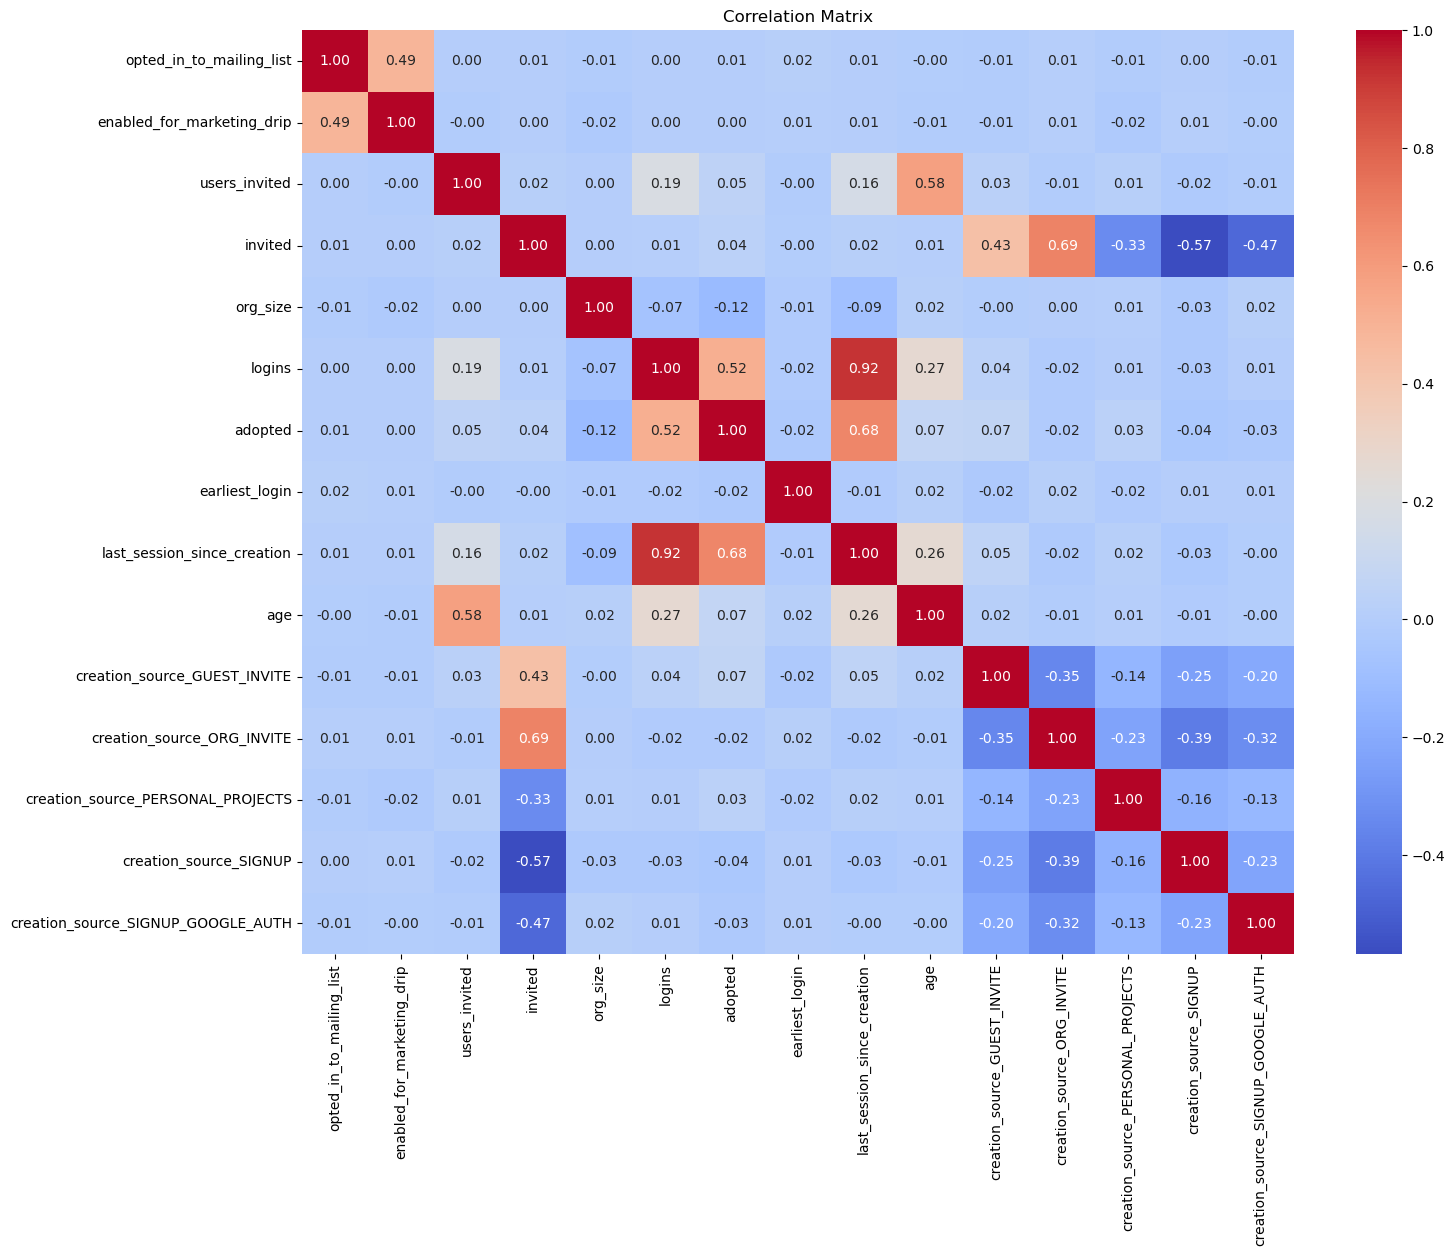

In [401]:
# Correlation matrix
fig = plt.figure(figsize=(16, 12))
sns.heatmap(users.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

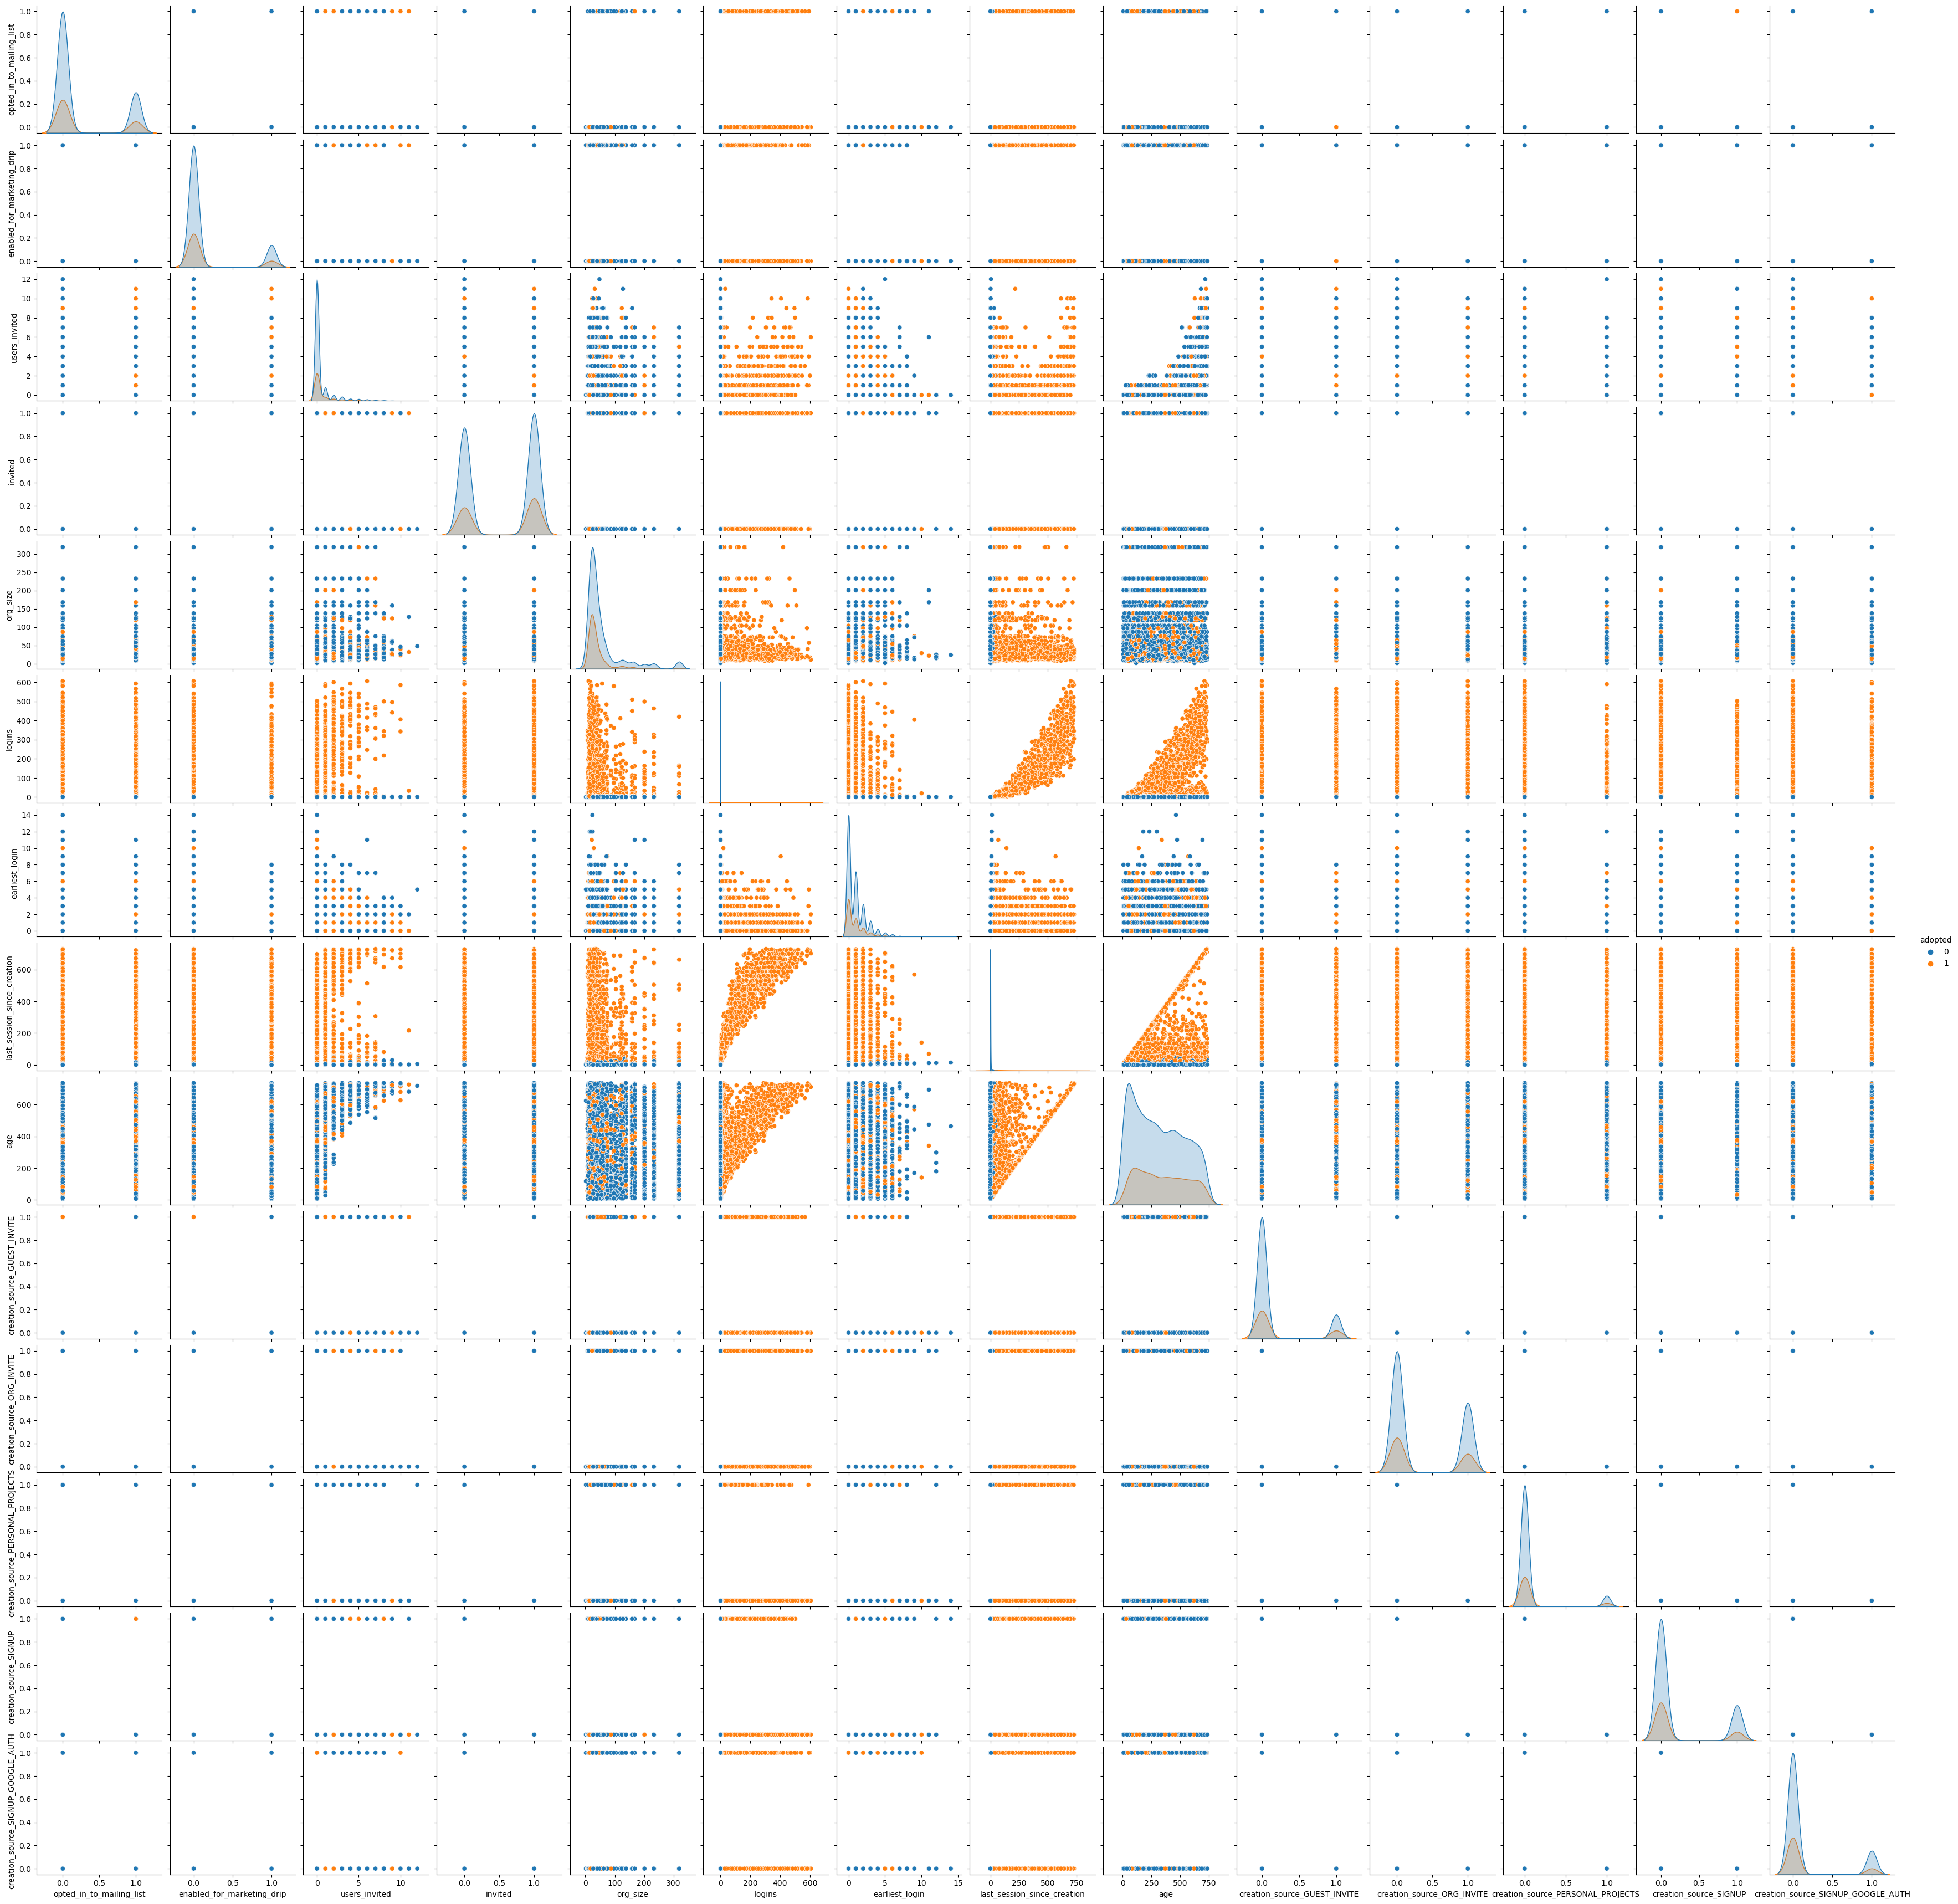

In [402]:
# Pairplot
sns.pairplot(users, hue='adopted')

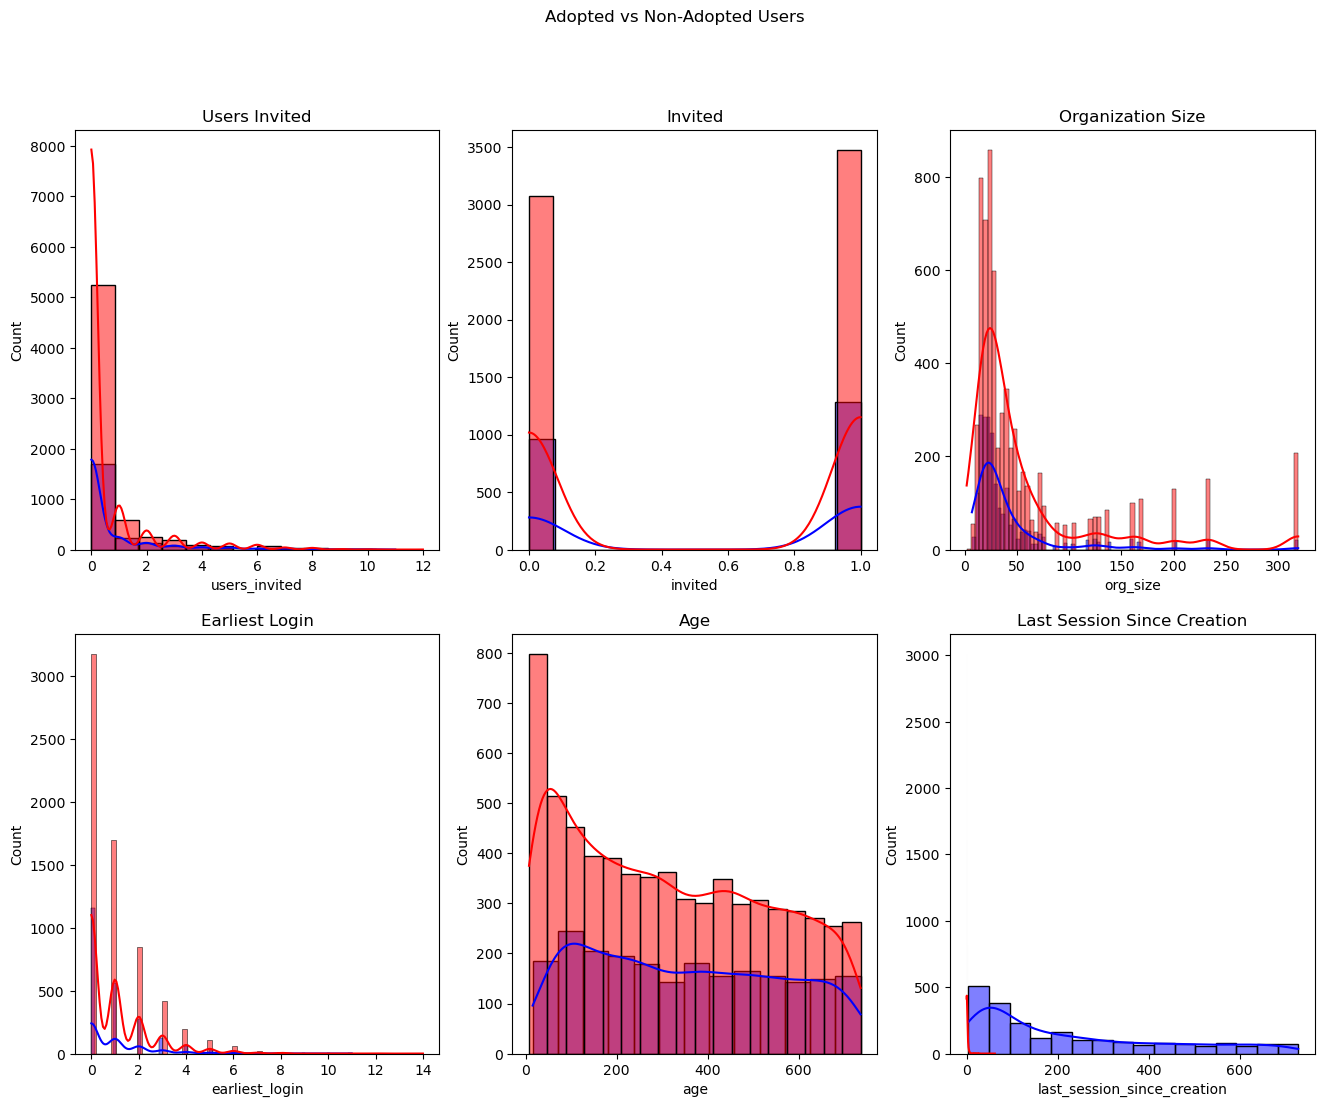

In [405]:
# Compare adopted and non-adopted users
adopted_users = users[users['adopted'] == 1]
non_adopted_users = users[users['adopted'] == 0]

# Compare adopted and non-adopted users
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Adopted vs Non-Adopted Users')

sns.histplot(adopted_users['users_invited'], kde=True, ax=axes[0, 0], color='blue', label='Adopted')
sns.histplot(non_adopted_users['users_invited'], kde=True, ax=axes[0, 0], color='red', label='Non-Adopted')
axes[0, 0].set_title('Users Invited')

sns.histplot(adopted_users['invited'], kde=True, ax=axes[0, 1], color='blue', label='Adopted')
sns.histplot(non_adopted_users['invited'], kde=True, ax=axes[0, 1], color='red', label='Non-Adopted')
axes[0, 1].set_title('Invited')

sns.histplot(adopted_users['org_size'], kde=True, ax=axes[0, 2], color='blue', label='Adopted')
sns.histplot(non_adopted_users['org_size'], kde=True, ax=axes[0, 2], color='red', label='Non-Adopted')
axes[0, 2].set_title('Organization Size')

sns.histplot(adopted_users['earliest_login'], kde=True, ax=axes[1, 0], color='blue', label='Adopted')
sns.histplot(non_adopted_users['earliest_login'], kde=True, ax=axes[1, 0], color='red', label='Non-Adopted')
axes[1, 0].set_title('Earliest Login')

sns.histplot(adopted_users['age'], kde=True, ax=axes[1, 1], color='blue', label='Adopted')
sns.histplot(non_adopted_users['age'], kde=True, ax=axes[1, 1], color='red', label='Non-Adopted')
axes[1, 1].set_title('Age')

sns.histplot(adopted_users['last_session_since_creation'], kde=True, ax=axes[1, 2], color='blue', label='Adopted')
sns.histplot(non_adopted_users['last_session_since_creation'], kde=True, ax=axes[1, 2], color='red', label='Non-Adopted')
axes[1, 2].set_title('Last Session Since Creation')


plt.show()

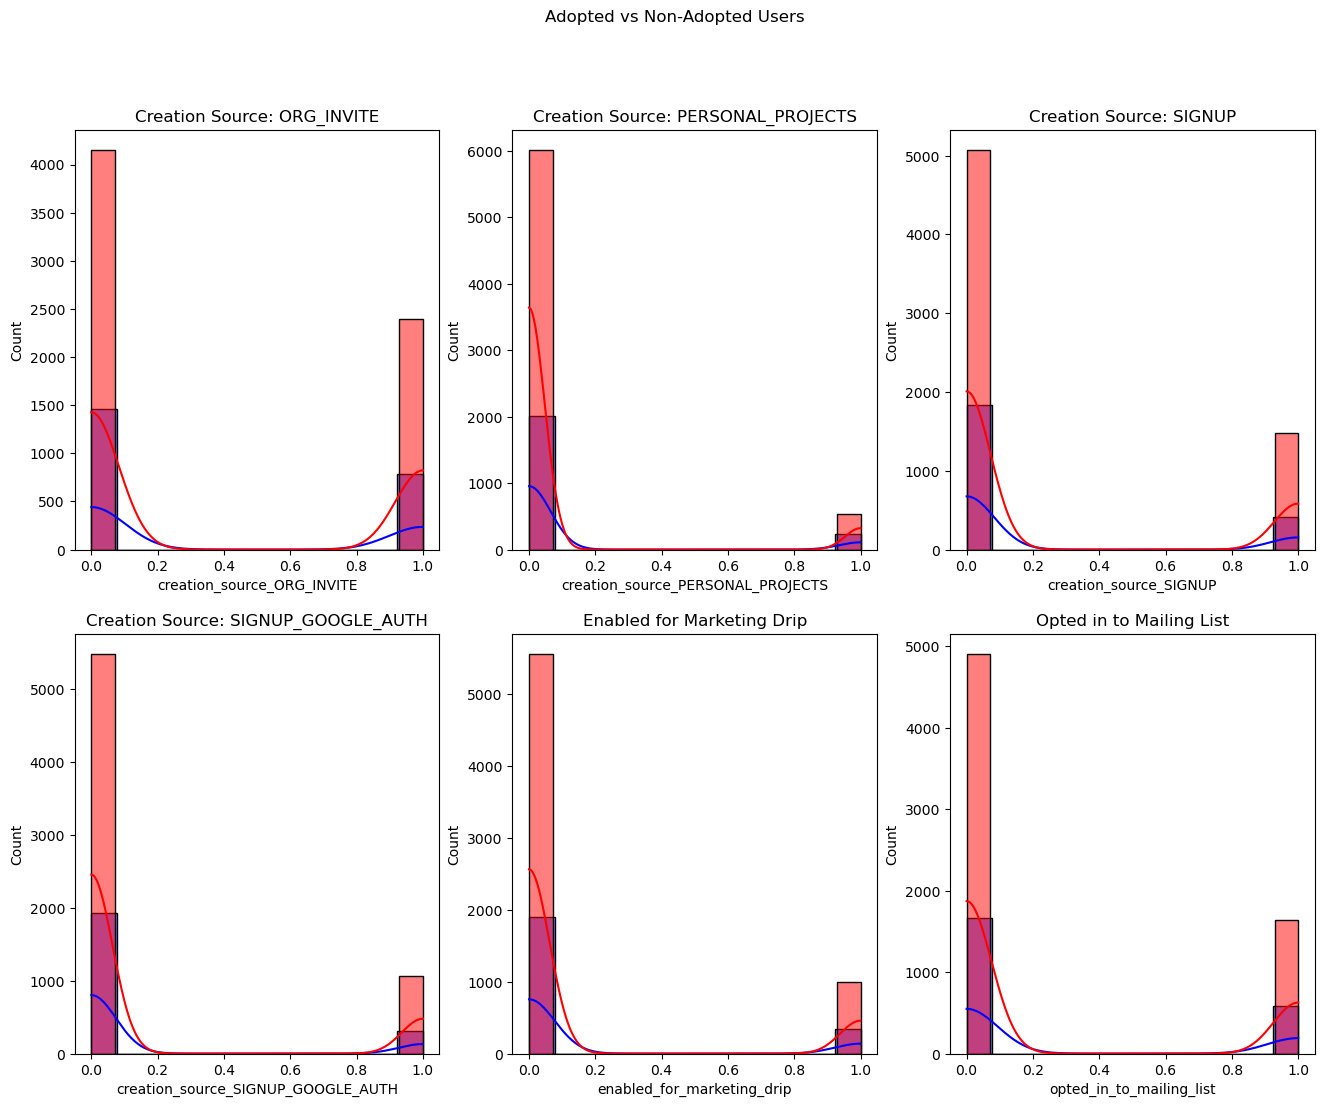

In [417]:
# Compare adopted and non-adopted users
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Adopted vs Non-Adopted Users')

sns.histplot(adopted_users['creation_source_ORG_INVITE'], kde=True, ax=axes[0, 0], color='blue', label='Adopted')
sns.histplot(non_adopted_users['creation_source_ORG_INVITE'], kde=True, ax=axes[0, 0], color='red', label='Non-Adopted')
axes[0, 0].set_title('Creation Source: ORG_INVITE')

sns.histplot(adopted_users['creation_source_PERSONAL_PROJECTS'], kde=True, ax=axes[0, 1], color='blue', label='Adopted')
sns.histplot(non_adopted_users['creation_source_PERSONAL_PROJECTS'], kde=True, ax=axes[0, 1], color='red', label='Non-Adopted')
axes[0, 1].set_title('Creation Source: PERSONAL_PROJECTS')

sns.histplot(adopted_users['creation_source_SIGNUP'], kde=True, ax=axes[0, 2], color='blue', label='Adopted')
sns.histplot(non_adopted_users['creation_source_SIGNUP'], kde=True, ax=axes[0, 2], color='red', label='Non-Adopted')
axes[0, 2].set_title('Creation Source: SIGNUP')

sns.histplot(adopted_users['creation_source_SIGNUP_GOOGLE_AUTH'], kde=True, ax=axes[1, 0], color='blue', label='Adopted')
sns.histplot(non_adopted_users['creation_source_SIGNUP_GOOGLE_AUTH'], kde=True, ax=axes[1, 0], color='red', label='Non-Adopted')
axes[1, 0].set_title('Creation Source: SIGNUP_GOOGLE_AUTH')

sns.histplot(adopted_users['enabled_for_marketing_drip'], kde=True, ax=axes[1, 1], color='blue', label='Adopted')
sns.histplot(non_adopted_users['enabled_for_marketing_drip'], kde=True, ax=axes[1, 1], color='red', label='Non-Adopted')
axes[1, 1].set_title('Enabled for Marketing Drip')

sns.histplot(adopted_users['opted_in_to_mailing_list'], kde=True, ax=axes[1, 2], color='blue', label='Adopted')
sns.histplot(non_adopted_users['opted_in_to_mailing_list'], kde=True, ax=axes[1, 2], color='red', label='Non-Adopted')
axes[1, 2].set_title('Opted in to Mailing List')

plt.show()

In [418]:
adopted_users.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,users_invited,invited,org_size,logins,adopted,earliest_login,last_session_since_creation,age,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
count,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.0,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000,2248.000000
mean,0.257117,0.154804,0.648577,0.571619,42.114769,89.413701,1.0,0.944840,227.117883,349.853648,0.223310,0.348310,0.102758,0.185943,0.139680
std,0.437142,0.361798,1.502464,0.494954,46.249331,125.185241,0.0,1.358544,209.059908,209.769453,0.416557,0.476541,0.303710,0.389147,0.346732
min,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,1.0,0.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,19.000000,6.000000,1.0,0.000000,52.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,25.000000,1.0,0.000000,140.500000,335.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,42.000000,124.500000,1.0,1.000000,363.250000,527.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,11.000000,1.000000,319.000000,606.000000,1.0,11.000000,729.000000,736.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Training and Evaluation

In [419]:
# Drop the logins
users = users.drop(columns=['logins'])

users

,opted_in_to_mailing_list,enabled_for_marketing_drip,users_invited,invited,org_size,adopted,earliest_login,last_session_since_creation,age,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,1,75,0,0,0,45,1,0,0,0,0
1,0,0,0,1,233,1,0,136,203,0,1,0,0,0
2,0,0,1,1,32,0,0,0,443,0,1,0,0,0
3,0,0,0,1,233,0,1,1,381,1,0,0,0,0
4,0,0,0,1,16,0,5,5,505,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,1,40,0,0,0,273,0,1,0,0,0
11996,0,0,1,0,25,0,5,5,511,0,0,0,0,1
11997,1,1,0,1,27,0,0,0,40,1,0,0,0,0
11998,0,0,7,0,138,0,2,2,736,0,0,1,0,0


In [420]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = users.drop(columns='adopted')
y = users['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [421]:
model_accuracies = {}

## Gradient Boosting

In [422]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# Model Accuracy
from sklearn.metrics import accuracy_score
model_accuracies['Gradient Boosting'] = round((accuracy_score(y_test, gb_pred) * 100), 2)
print(f'Gradient Boosting Accuracy: {model_accuracies["Gradient Boosting"]}')

[[1936   45]
 [  17  642]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1981
           1       0.93      0.97      0.95       659

    accuracy                           0.98      2640
   macro avg       0.96      0.98      0.97      2640
weighted avg       0.98      0.98      0.98      2640

Gradient Boosting Accuracy: 97.65


In [423]:
# Feature Importance
feature_importance = pd.DataFrame(gb_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
last_session_since_creation,0.981812
age,0.006281
org_size,0.005291
earliest_login,0.003895
users_invited,0.001776
invited,0.000226
creation_source_PERSONAL_PROJECTS,0.000200
creation_source_SIGNUP_GOOGLE_AUTH,0.000162
creation_source_SIGNUP,0.000150
creation_source_GUEST_INVITE,0.000119


## Keras Neural Network

In [424]:
from keras import layers
from keras.models import Sequential

# Neural Network
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Model Evaluation
nn_pred = model.predict(X_test)
nn_pred = (nn_pred > 0.5)
print(confusion_matrix(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

# Model Accuracy
model_accuracies['Neural Network'] = round((accuracy_score(y_test, nn_pred) * 100), 2)
print(f'Neural Network Accuracy: {model_accuracies["Neural Network"]}')

c:\Users\eliwi\anaconda3\Lib\site-packages\keras\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
[[1929   52]
 [  15  644]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1981
           1       0.93      0.98      0.95       659

    accuracy                           0.97      2640
   macro avg       0.96      0.98      0.97      2640
weighted avg       0.98      0.97      0.97      2640

Neural Network Accuracy: 97.46


## Perceptron

In [425]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_pred = perceptron_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, perceptron_pred))
print(classification_report(y_test, perceptron_pred))

# Model Accuracy
model_accuracies['Perceptron'] = round((accuracy_score(y_test, perceptron_pred) * 100), 2)
print(f'Perceptron Accuracy: {model_accuracies["Perceptron"]}')

[[1958   23]
 [  52  607]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1981
           1       0.96      0.92      0.94       659

    accuracy                           0.97      2640
   macro avg       0.97      0.95      0.96      2640
weighted avg       0.97      0.97      0.97      2640

Perceptron Accuracy: 97.16


## Random Forest

In [426]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Model Accuracy
model_accuracies['Random Forest'] = round((accuracy_score(y_test, rf_pred) * 100), 2)
print(f'Random Forest Accuracy: {model_accuracies["Random Forest"]}')

[[1937   44]
 [  21  638]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1981
           1       0.94      0.97      0.95       659

    accuracy                           0.98      2640
   macro avg       0.96      0.97      0.97      2640
weighted avg       0.98      0.98      0.98      2640

Random Forest Accuracy: 97.54


In [427]:
# Feature Importance
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
last_session_since_creation,0.876376
age,0.046002
org_size,0.037198
earliest_login,0.013104
users_invited,0.007524
opted_in_to_mailing_list,0.003868
enabled_for_marketing_drip,0.003734
creation_source_GUEST_INVITE,0.003018
creation_source_ORG_INVITE,0.002100
creation_source_SIGNUP,0.001960


## Random Forest Regressor

In [428]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)

# Model Evaluation
rf_reg_pred = rf_reg_pred > 0.5
print(confusion_matrix(y_test, rf_reg_pred))
print(classification_report(y_test, rf_reg_pred))

# Model Accuracy
model_accuracies['Random Forest Regressor'] = round((accuracy_score(y_test, rf_reg_pred) * 100), 2)
print(f'Random Forest Regressor Accuracy: {model_accuracies["Random Forest Regressor"]}')

[[1934   47]
 [  26  633]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1981
           1       0.93      0.96      0.95       659

    accuracy                           0.97      2640
   macro avg       0.96      0.97      0.96      2640
weighted avg       0.97      0.97      0.97      2640

Random Forest Regressor Accuracy: 97.23


## Model Accuracies

In [429]:
accuracies = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
accuracies = accuracies.sort_values('Accuracy', ascending=False)
accuracies

,Model,Accuracy
0,Gradient Boosting,97.65
3,Random Forest,97.54
1,Neural Network,97.46
4,Random Forest Regressor,97.23
2,Perceptron,97.16


### Will combine the models to create a voting classifier to see if the combined models can predict active users better than the individual models.<br>

In [430]:
class Classifier():

    def __init__(self, gb_model, rf_model, model, perceptron_model, rf_reg):
        self.GB_model = gb_model
        self.RF_model = rf_model
        self.RFReg_model = rf_reg
        self.keras_model = model
        self.perceptron_model = perceptron_model

    def predict(self, X):

        GB_predictions = self.GB_model.predict(X)
        GB_predictions = GB_predictions.reshape(-1, 1)

        RF_predictions = self.RF_model.predict(X)
        RF_predictions = RF_predictions.reshape(-1, 1)

        RFReg_predictions = self.RFReg_model.predict(X)
        RFReg_predictions = RFReg_predictions.reshape(-1, 1)
        RFReg_predictions = RFReg_predictions > 0.5

        NN_predictions = self.keras_model.predict(X)
        NN_predictions = NN_predictions > 0.5
        perceptron_predictions = self.perceptron_model.predict(X)
        perceptron_predictions = perceptron_predictions.reshape(-1, 1)

        predictions = np.mean([GB_predictions, RFReg_predictions, RF_predictions, NN_predictions, perceptron_predictions], axis=0)

        return predictions
    
    def score(self, X, y):
        # Get the mean of the predictions
        mean_predictions = self.predict(X)
        # Return the accuracy
        return accuracy_score(y, mean_predictions > 0.5)
    
# Create the ensemble model
ensemble = Classifier(gb_model, rf_model, model, perceptron_model, rf_reg)

# Get the accuracy of the ensemble model
ensemble_score = ensemble.score(X_test, y_test)
print(f'Ensemble Model Accuracy: {round(ensemble_score * 100, 2)}')

# Model Evaluation
ensemble_pred = ensemble.predict(X_test)
ensemble_pred = ensemble_pred.reshape(-1) > 0.5  # Reshape the predictions array
print(confusion_matrix(y_test, ensemble_pred))
print(classification_report(y_test, ensemble_pred))

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
Ensemble Model Accuracy: 97.5
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
[[1936   45]
 [  21  638]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1981
           1       0.93      0.97      0.95       659

    accuracy                           0.97      2640
   macro avg       0.96      0.97      0.97      2640
weighted avg       0.98      0.97      0.98      2640



In [431]:
accuracies

,Model,Accuracy
0,Gradient Boosting,97.65
3,Random Forest,97.54
1,Neural Network,97.46
4,Random Forest Regressor,97.23
2,Perceptron,97.16


## Gradient Boosting Classifier is the best model for predicting active users with an accuracy of 97.65%.<br>

In [432]:
# Feature Importance
feature_importance = pd.DataFrame(gb_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
last_session_since_creation,0.981812
age,0.006281
org_size,0.005291
earliest_login,0.003895
users_invited,0.001776
invited,0.000226
creation_source_PERSONAL_PROJECTS,0.000200
creation_source_SIGNUP_GOOGLE_AUTH,0.000162
creation_source_SIGNUP,0.000150
creation_source_GUEST_INVITE,0.000119


## It appears that the 'last_session_since_creation' column is the most important feature for predicting active users.<br>

## 'last_session_since_creation' is calculated by subtracting the 'creation_time' from the last recorded login, 'last_session_created_time.<br>

## It seems that the longer the user is involved in work that would benefit from the product, the more likely they are to become an active user if they use the product again later on.<br>

## I would recommend that the company develop some sort of incentive to get users to use the product again 